In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-rankings/Discussions_rankings.csv
/kaggle/input/kaggle-rankings/Datasets_rankings.csv
/kaggle/input/kaggle-rankings/Notebooks_rankings.csv
/kaggle/input/kaggle-rankings/combined.csv
/kaggle/input/kaggle-rankings/competitions_rankings.csv


In [3]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 28.4 MB/s eta 0:00:0000:0100:01


In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import sweetviz as sv

In [6]:
df = pd.read_csv("../input/kaggle-rankings/Notebooks_rankings.csv")

In [7]:
df.head()

,currentRanking,userId,displayName,userUrl,joinTime,joinDate,tier,totalGoldMedals,totalSilverMedals,totalBronzeMedals,points
0,1,1723677,Chris Deotte,/cdeotte,22:51:30.630,2018-03-14,GRANDMASTER,67,16,3,4908
1,2,5309,Abhishek Thakur,/abhishek,03:44:52,2011-01-12,GRANDMASTER,64,25,24,3392
2,3,3012786,Marília Prata,/mpwolke,19:09:20.750,2019-03-29,MASTER,12,31,391,3285
3,4,1695531,Y.Nakama,/yasufuminakama,11:56:37.560,2018-03-06,GRANDMASTER,32,11,5,2476
4,5,3574256,Awsaf,/awsaf49,18:27:24.093,2019-08-12,GRANDMASTER,24,5,11,2416


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   currentRanking     3806 non-null   int64 
 1   userId             3806 non-null   int64 
 2   displayName        3806 non-null   object
 3   userUrl            3806 non-null   object
 4   joinTime           3806 non-null   object
 5   joinDate           3806 non-null   object
 6   tier               3806 non-null   object
 7   totalGoldMedals    3806 non-null   int64 
 8   totalSilverMedals  3806 non-null   int64 
 9   totalBronzeMedals  3806 non-null   int64 
 10  points             3806 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 327.2+ KB


In [9]:
df.describe()

,currentRanking,userId,totalGoldMedals,totalSilverMedals,totalBronzeMedals,points
count,3806.00000,3.806000e+03,3806.000000,3806.000000,3806.000000,3806.000000
mean,1903.50000,3.827361e+06,1.170257,2.283762,7.388071,106.183395
std,1098.84189,2.592064e+06,3.711037,3.544704,9.432934,219.073940
min,1.00000,3.680000e+02,0.000000,0.000000,0.000000,0.000000
25%,952.25000,1.545172e+06,0.000000,0.000000,4.250000,25.000000
50%,1903.50000,3.573043e+06,0.000000,1.000000,6.000000,47.000000
75%,2854.75000,5.594203e+06,1.000000,3.000000,8.000000,95.000000
max,3806.00000,1.102308e+07,67.000000,53.000000,391.000000,4908.000000


In [10]:
df.shape

(3806, 11)

In [11]:
df.isna().sum()

currentRanking       0
userId               0
displayName          0
userUrl              0
joinTime             0
joinDate             0
tier                 0
totalGoldMedals      0
totalSilverMedals    0
totalBronzeMedals    0
points               0
dtype: int64

In [12]:
df.joinDate = pd.to_datetime(df['joinDate'],infer_datetime_format=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   currentRanking     3806 non-null   int64         
 1   userId             3806 non-null   int64         
 2   displayName        3806 non-null   object        
 3   userUrl            3806 non-null   object        
 4   joinTime           3806 non-null   object        
 5   joinDate           3806 non-null   datetime64[ns]
 6   tier               3806 non-null   object        
 7   totalGoldMedals    3806 non-null   int64         
 8   totalSilverMedals  3806 non-null   int64         
 9   totalBronzeMedals  3806 non-null   int64         
 10  points             3806 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 327.2+ KB


In [14]:
plt.figure(figsize=(10,9))


<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<AxesSubplot:xlabel='joinDate'>

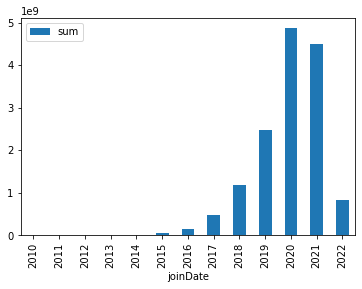

In [15]:
df.groupby(df['joinDate'].dt.year)['userId'].agg(['sum']).plot(kind='bar')

<AxesSubplot:xlabel='joinDate'>

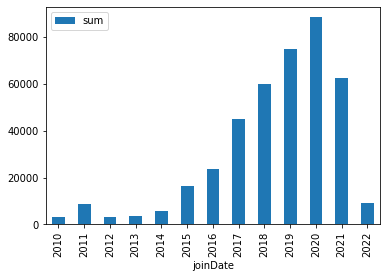

In [16]:
df.groupby(df['joinDate'].dt.year)['points'].agg(['sum']).plot(kind='bar')

In [17]:
df['tier'].value_counts()

EXPERT         3375
MASTER          342
GRANDMASTER      89
Name: tier, dtype: int64

<AxesSubplot:>

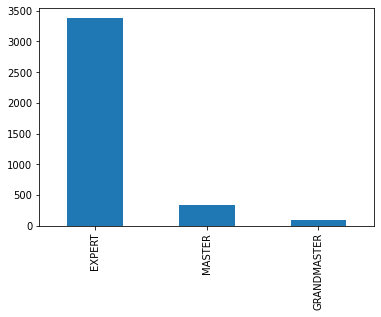

In [18]:
df['tier'].value_counts().plot(kind='bar')

In [19]:
df[['currentRanking','userId']]

,currentRanking,userId
0,1,1723677
1,2,5309
2,3,3012786
3,4,1695531
4,5,3574256
...,...,...
3801,3802,28980
3802,3803,278651
3803,3804,483032
3804,3805,1182967


<AxesSubplot:xlabel='userId'>

<Figure size 720x648 with 0 Axes>

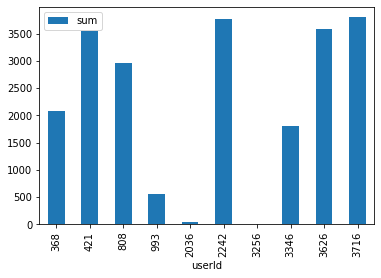

In [25]:
#currentRanking
plt.figure(figsize=(10,9))
df.groupby(df['userId'])['currentRanking'].agg(['sum']).head(10).plot(kind='bar')

<AxesSubplot:xlabel='currentRanking'>

<Figure size 720x648 with 0 Axes>

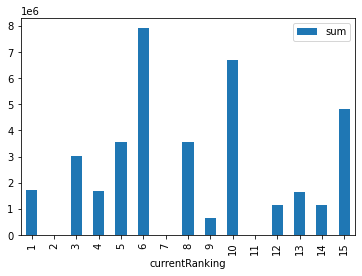

In [28]:
#currentRanking
plt.figure(figsize=(10,9))
df.groupby(df['currentRanking'])['userId'].agg(['sum']).head(15).plot(kind='bar')

In [29]:
df.tail()

,currentRanking,userId,displayName,userUrl,joinTime,joinDate,tier,totalGoldMedals,totalSilverMedals,totalBronzeMedals,points
3801,3802,28980,Ben Watson,/benwatson,05:32:46.067,2012-01-09,EXPERT,0,0,5,1
3802,3803,278651,Soumitra Agarwal,/artimous,08:40:54.057,2015-01-06,EXPERT,0,0,8,1
3803,3804,483032,Ronin,/rdslater,01:59:41.863,2015-12-08,EXPERT,0,0,6,1
3804,3805,1182967,VirgoData,/virgodata,07:23:49.487,2017-07-24,EXPERT,0,0,5,1
3805,3806,1182983,MHA,/hamzaashraf,07:33:51.517,2017-07-24,EXPERT,0,0,5,0


<AxesSubplot:xlabel='totalBronzeMedals', ylabel='Density'>

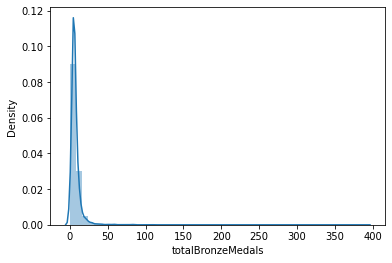

In [31]:
sns.distplot(df['totalBronzeMedals'])

                                             |          | [  0%]   00:00 -> (? left)


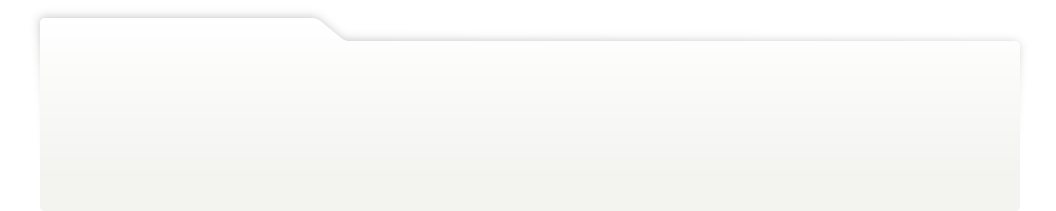
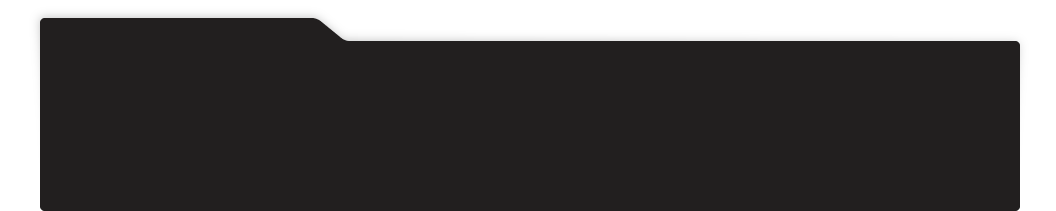
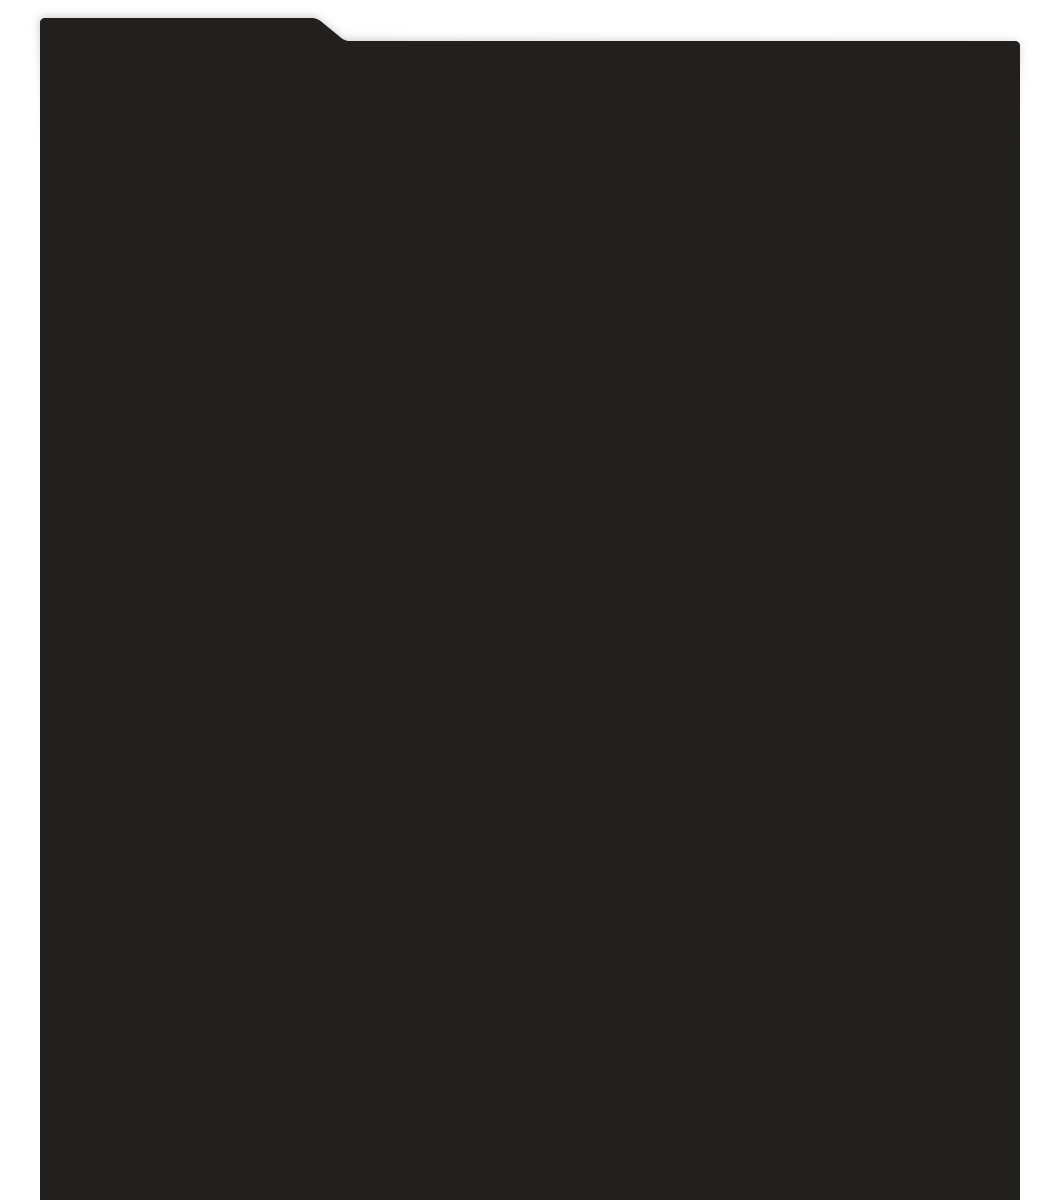
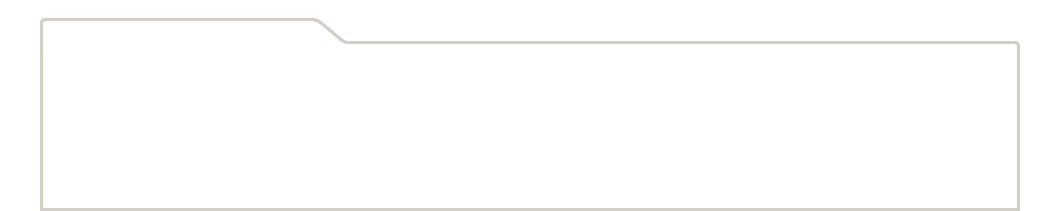
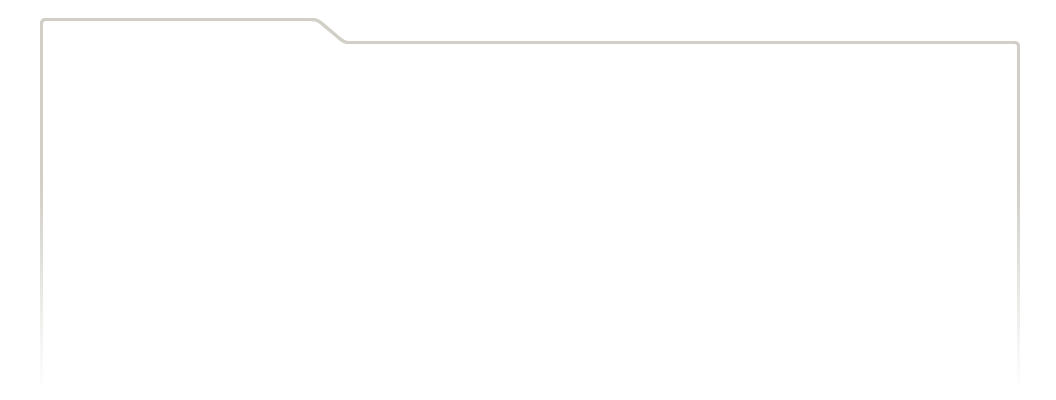
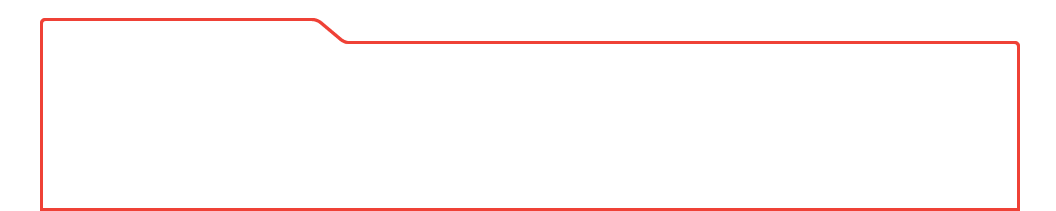
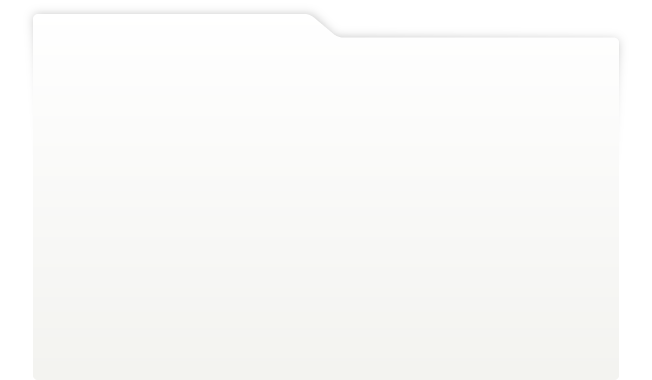
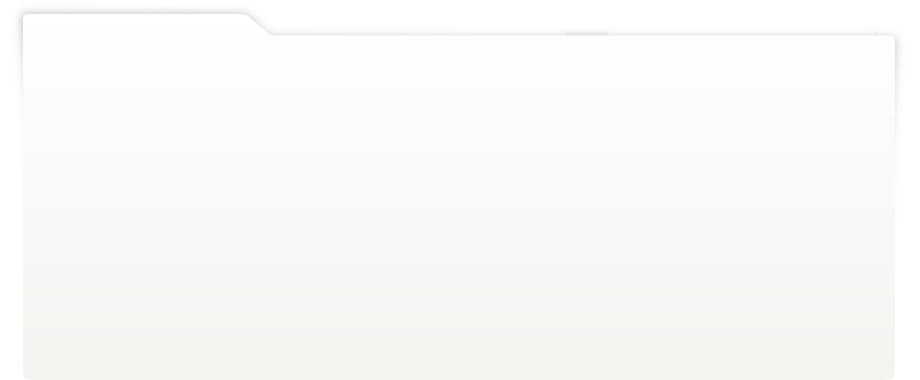
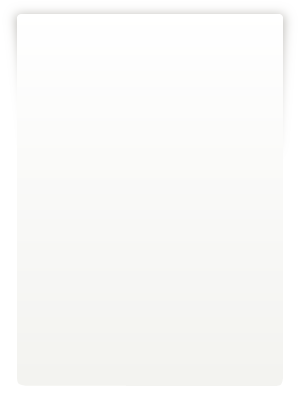
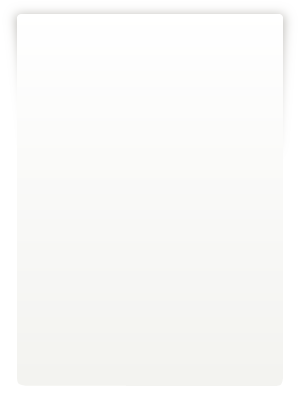
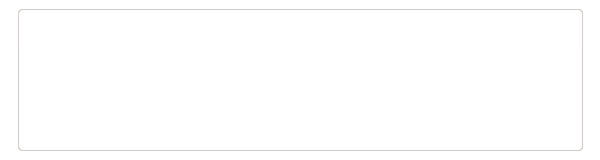
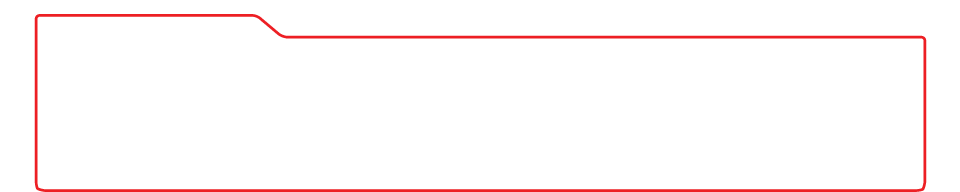
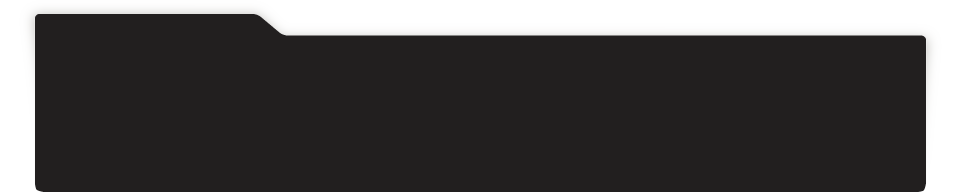
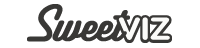
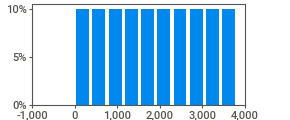
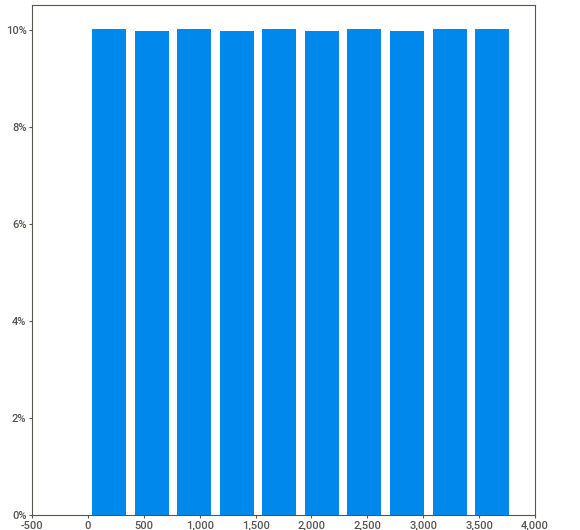
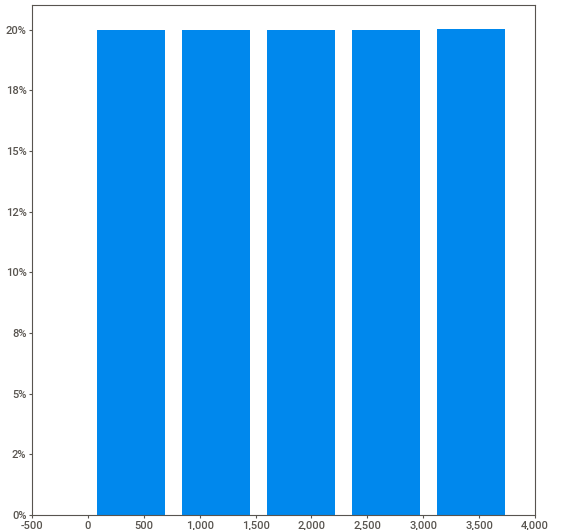
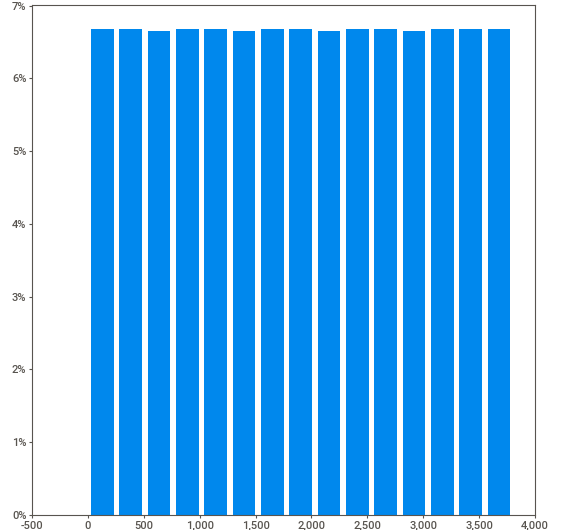
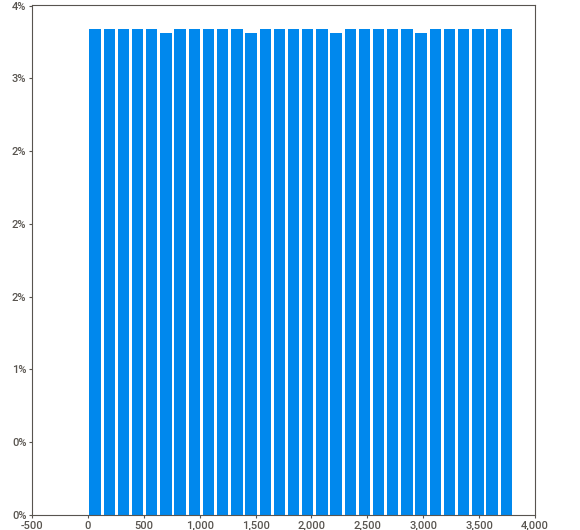
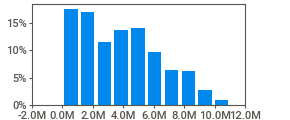
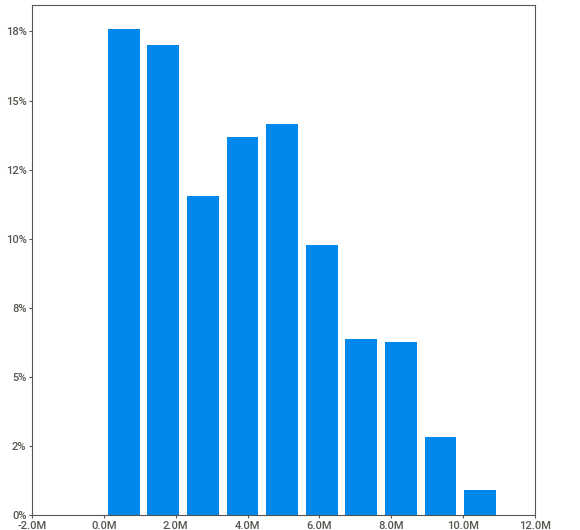
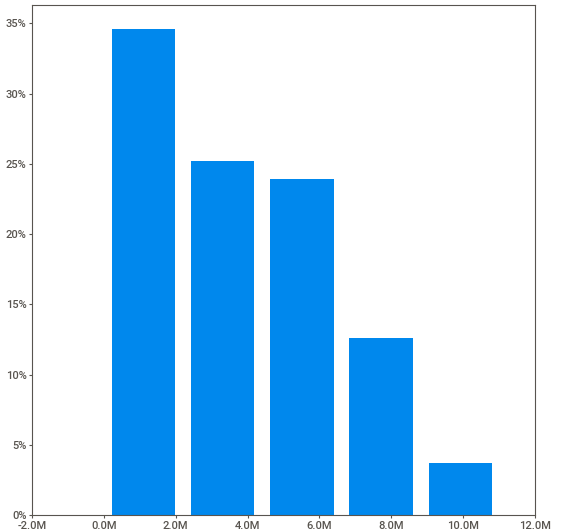
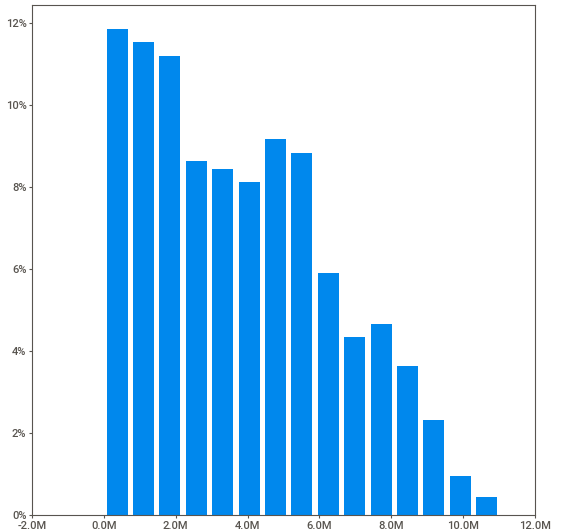
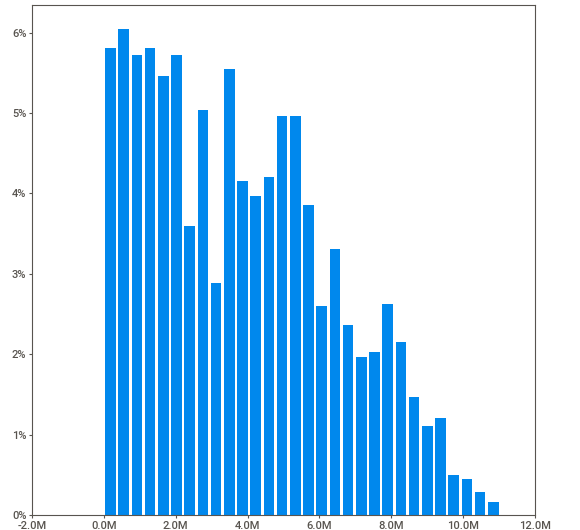
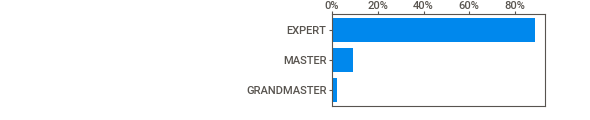
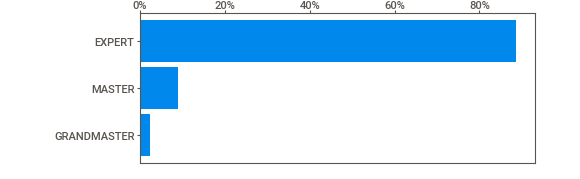
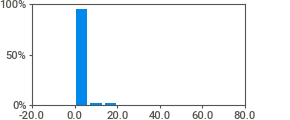
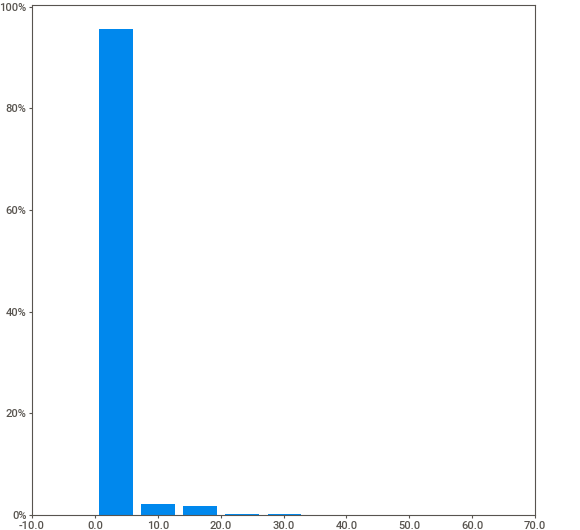
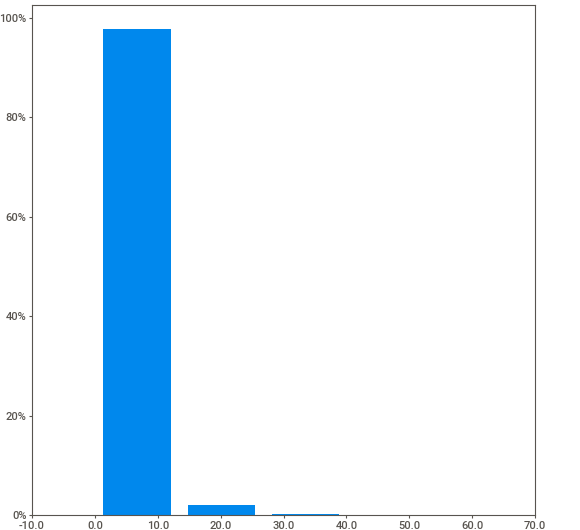
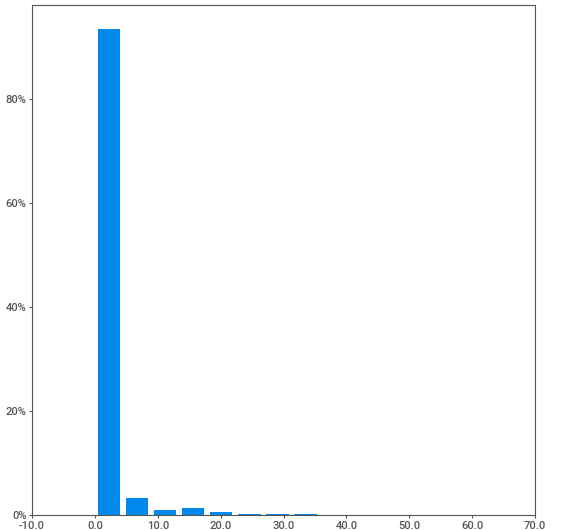
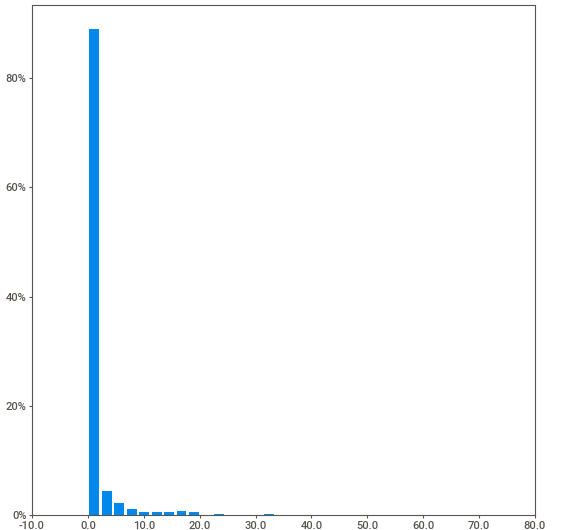
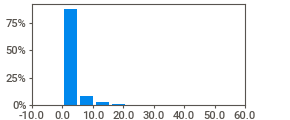
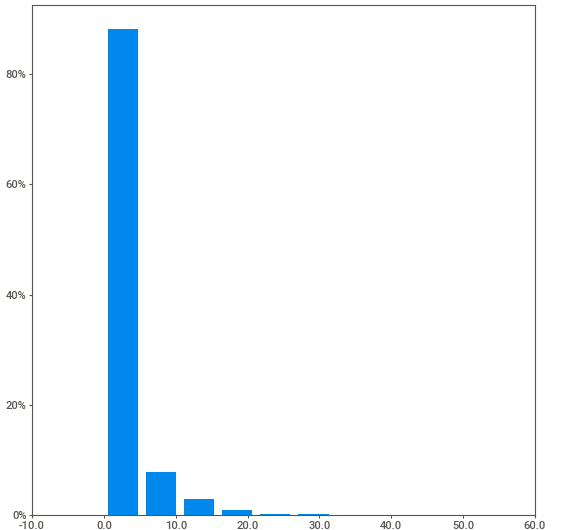
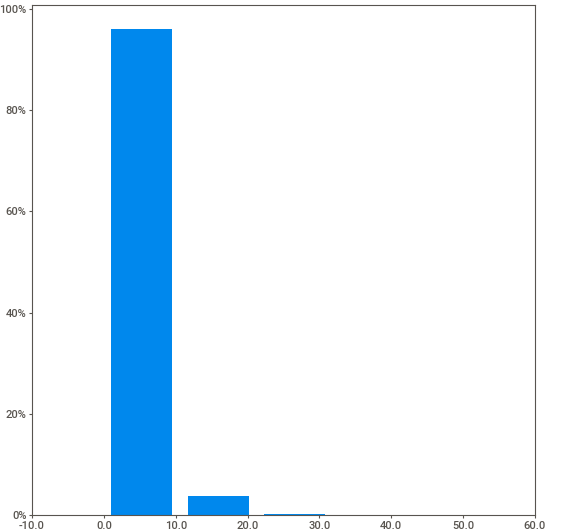
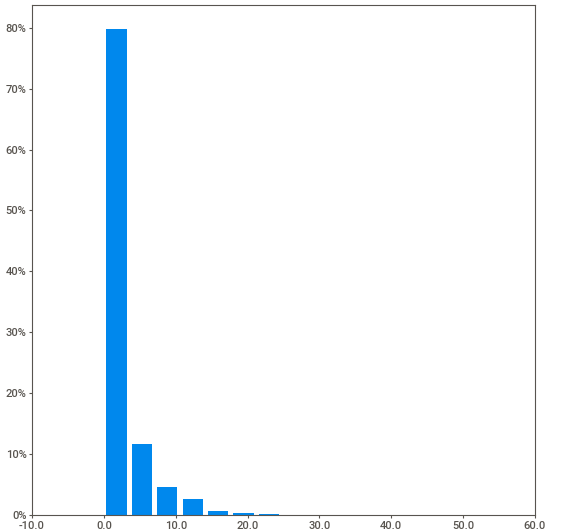
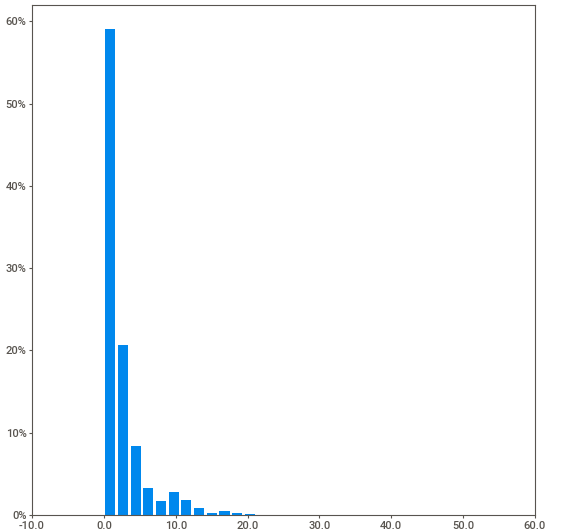
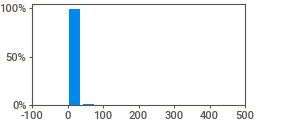
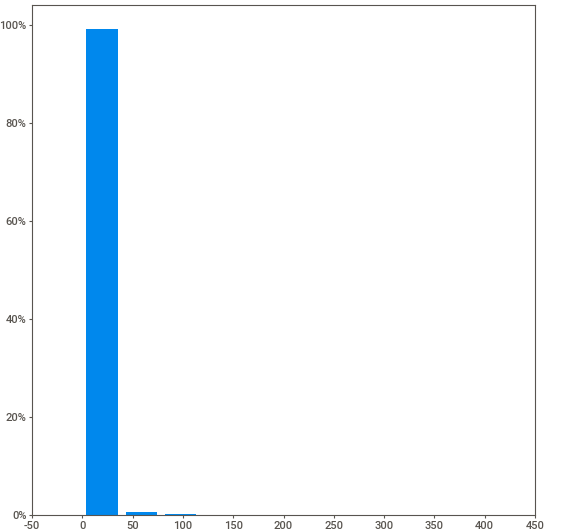
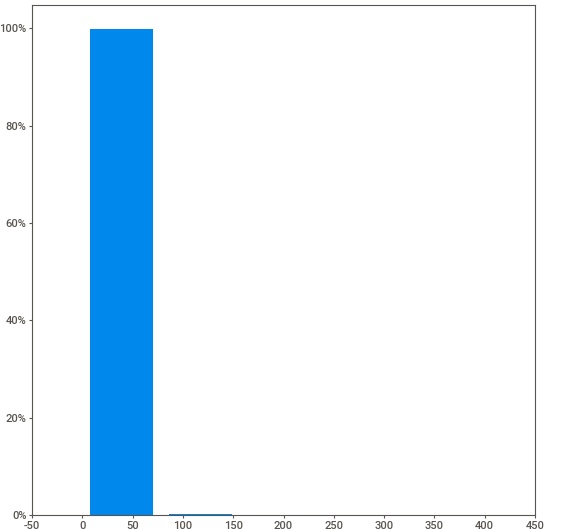
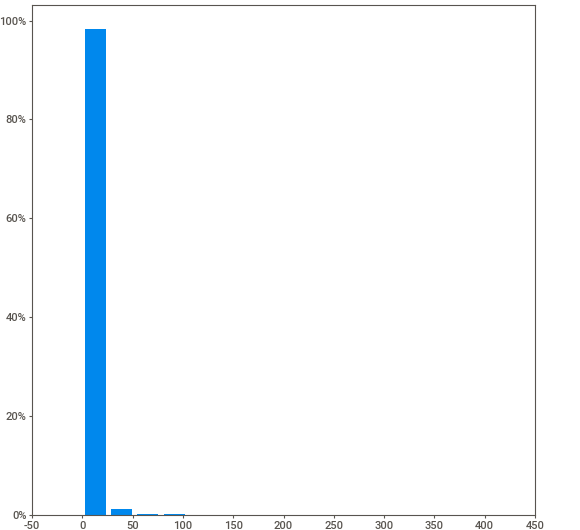
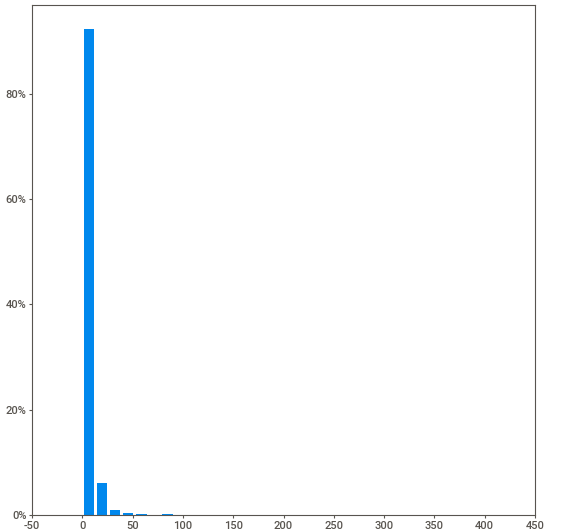
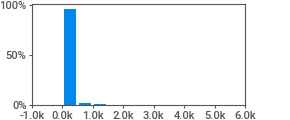
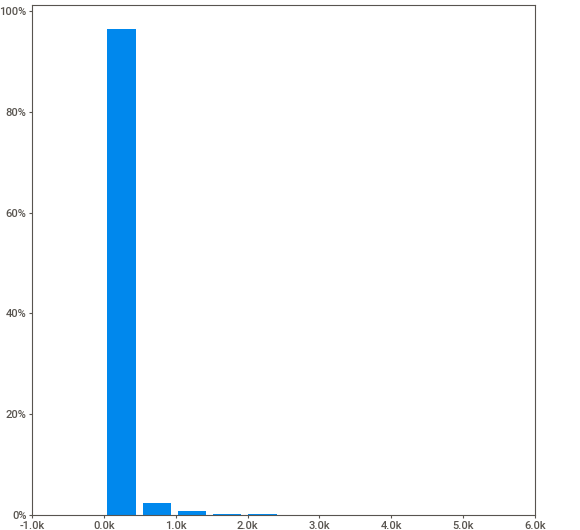
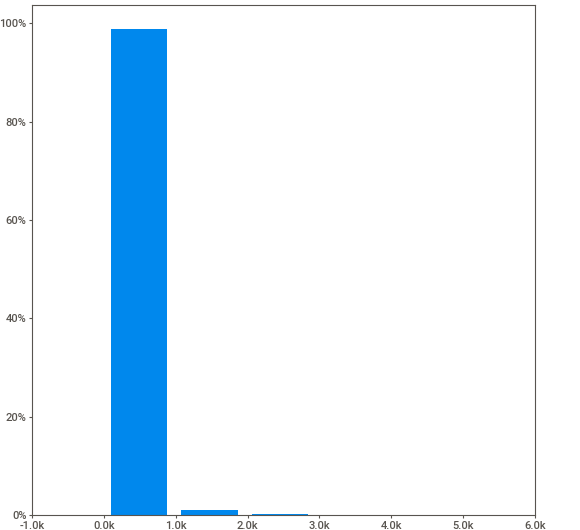
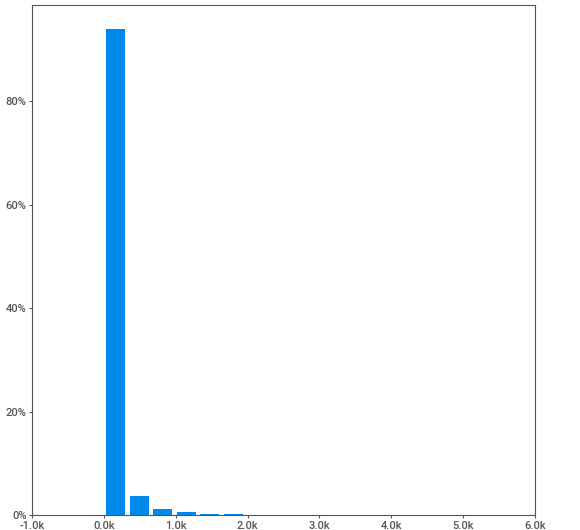
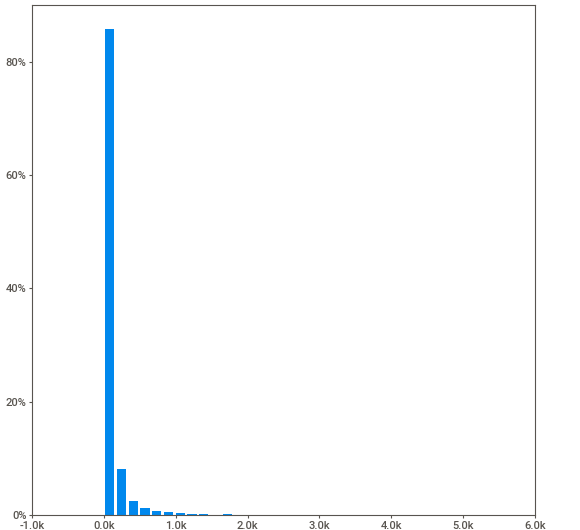
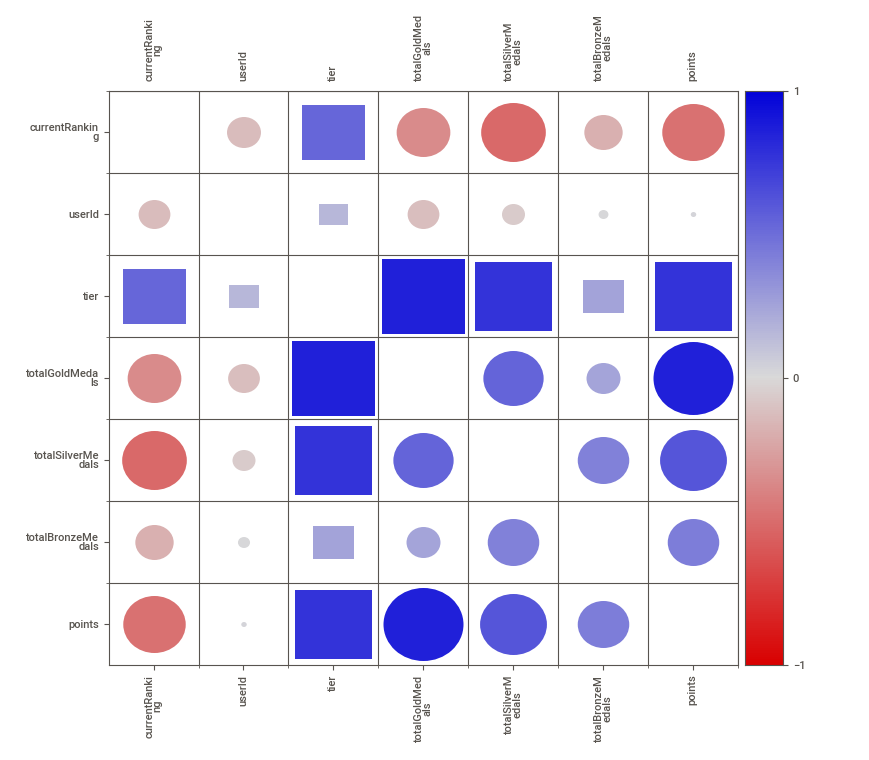
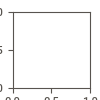

In [33]:
sweet_report = sv.analyze(df)
sweet_report.show_notebook()

In [36]:
encoder = LabelEncoder()
df['tier'] = encoder.fit_transform(df['tier'])

In [37]:
df.head()

,currentRanking,userId,displayName,userUrl,joinTime,joinDate,tier,totalGoldMedals,totalSilverMedals,totalBronzeMedals,points
0,1,1723677,Chris Deotte,/cdeotte,22:51:30.630,2018-03-14,1,67,16,3,4908
1,2,5309,Abhishek Thakur,/abhishek,03:44:52,2011-01-12,1,64,25,24,3392
2,3,3012786,Marília Prata,/mpwolke,19:09:20.750,2019-03-29,2,12,31,391,3285
3,4,1695531,Y.Nakama,/yasufuminakama,11:56:37.560,2018-03-06,1,32,11,5,2476
4,5,3574256,Awsaf,/awsaf49,18:27:24.093,2019-08-12,1,24,5,11,2416


In [39]:
df1 = df.drop(['userId','displayName','displayName','displayName','displayName'], axis=1)

In [40]:
df1

,currentRanking,userUrl,joinTime,joinDate,tier,totalGoldMedals,totalSilverMedals,totalBronzeMedals,points
0,1,/cdeotte,22:51:30.630,2018-03-14,1,67,16,3,4908
1,2,/abhishek,03:44:52,2011-01-12,1,64,25,24,3392
2,3,/mpwolke,19:09:20.750,2019-03-29,2,12,31,391,3285
3,4,/yasufuminakama,11:56:37.560,2018-03-06,1,32,11,5,2476
4,5,/awsaf49,18:27:24.093,2019-08-12,1,24,5,11,2416
...,...,...,...,...,...,...,...,...,...
3801,3802,/benwatson,05:32:46.067,2012-01-09,0,0,0,5,1
3802,3803,/artimous,08:40:54.057,2015-01-06,0,0,0,8,1
3803,3804,/rdslater,01:59:41.863,2015-12-08,0,0,0,6,1
3804,3805,/virgodata,07:23:49.487,2017-07-24,0,0,0,5,1


<AxesSubplot:>

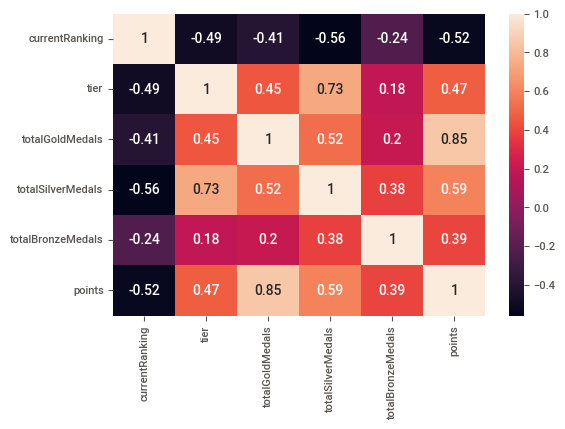

In [41]:
corr = df1.corr()
corr
sns.heatmap(corr, annot=True)

In [45]:
X = df[['totalGoldMedals','totalSilverMedals','totalBronzeMedals','points', 'currentRanking']]
Y = df[['tier']]

In [48]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [51]:
X_train , X_test , y_train , y_test = train_test_split(X, Y ,train_size = 0.8)

In [55]:
svm_model = SVC(C = 1.0 , kernel = 'rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)



0.9960629921259843

In [65]:
 clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=3, max_iter=10, warm_start=True)
 for i in range(10):
     clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9986876640419947

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [70]:
accuracy_score(y_test, dtree_predictions)

0.994750656167979

In [72]:


from xgboost import XGBClassifier

In [73]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [74]:
predict = model.predict(X_test)

In [76]:
accuracy_score(y_test, predict)

1.0